# Credit Card Fraud Detection Project ( Smart bridge)

# PREPARE BY :- (yash gupta) and ( dinkar rajput)

# Data Preprocessing and Exploration of Data

## STEP 1 :- importing  of necessary libraries


In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

## STEP 2:- Importing of dataset

In [2]:
data=pd.read_csv("C:\\Users\\ashok\\Desktop\\creditcard.csv")

# STEP 3:- data exploration

### CHECKING HEAD AND TAIL

In [3]:

data.head()
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### CHECKING COLUMNS



In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### CHECKING DATA INFORMATION ( DATA-TYPES)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### GO THROGH DATA - STATISTICAL ANALYSIS

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### SPLIT DEPENDENT(Y)  AND INDEPENDENT VARIABELS(X)

In [7]:
x=data.iloc[:,1:30].values
y=data.iloc[:,30].values

### CHECKING X AND Y SHAPES

In [8]:
x.shape
y.shape

(284807,)

### CHECKING NULL VALUES

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data visualisation

#### DATA SOMEWHERE LOOK LIKE (BY PLOTTING Y WITH X_VARIABLE(AMOUNT)

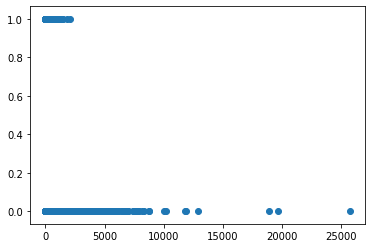

In [10]:
plt.scatter(x[:,28],y)

### CHECKING FRAUD AND NON-FRAUD VALUE (BY COUNTPLOT)

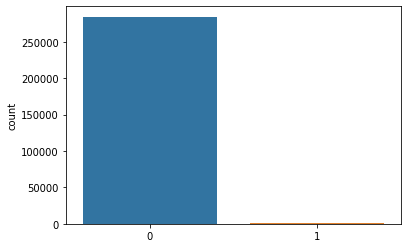

In [11]:
 sns.countplot(y)

In [12]:
# NO OF FRAUD AND NORMAL DATA
fraud_data=data[data['Class']==1]
normal_data=data[data['Class']==0]
print(fraud_data.shape,normal_data.shape)

(492, 31) (284315, 31)


In [13]:
# FRAUD DATA STATISTACAL ANALYSIS
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# NORMAL DATA STATISTACAL ANALYSIS
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### CHECKING CORRELATION TABLE AND GRAPH

In [15]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


#### HEAT MAP (F OR CORRELATION)

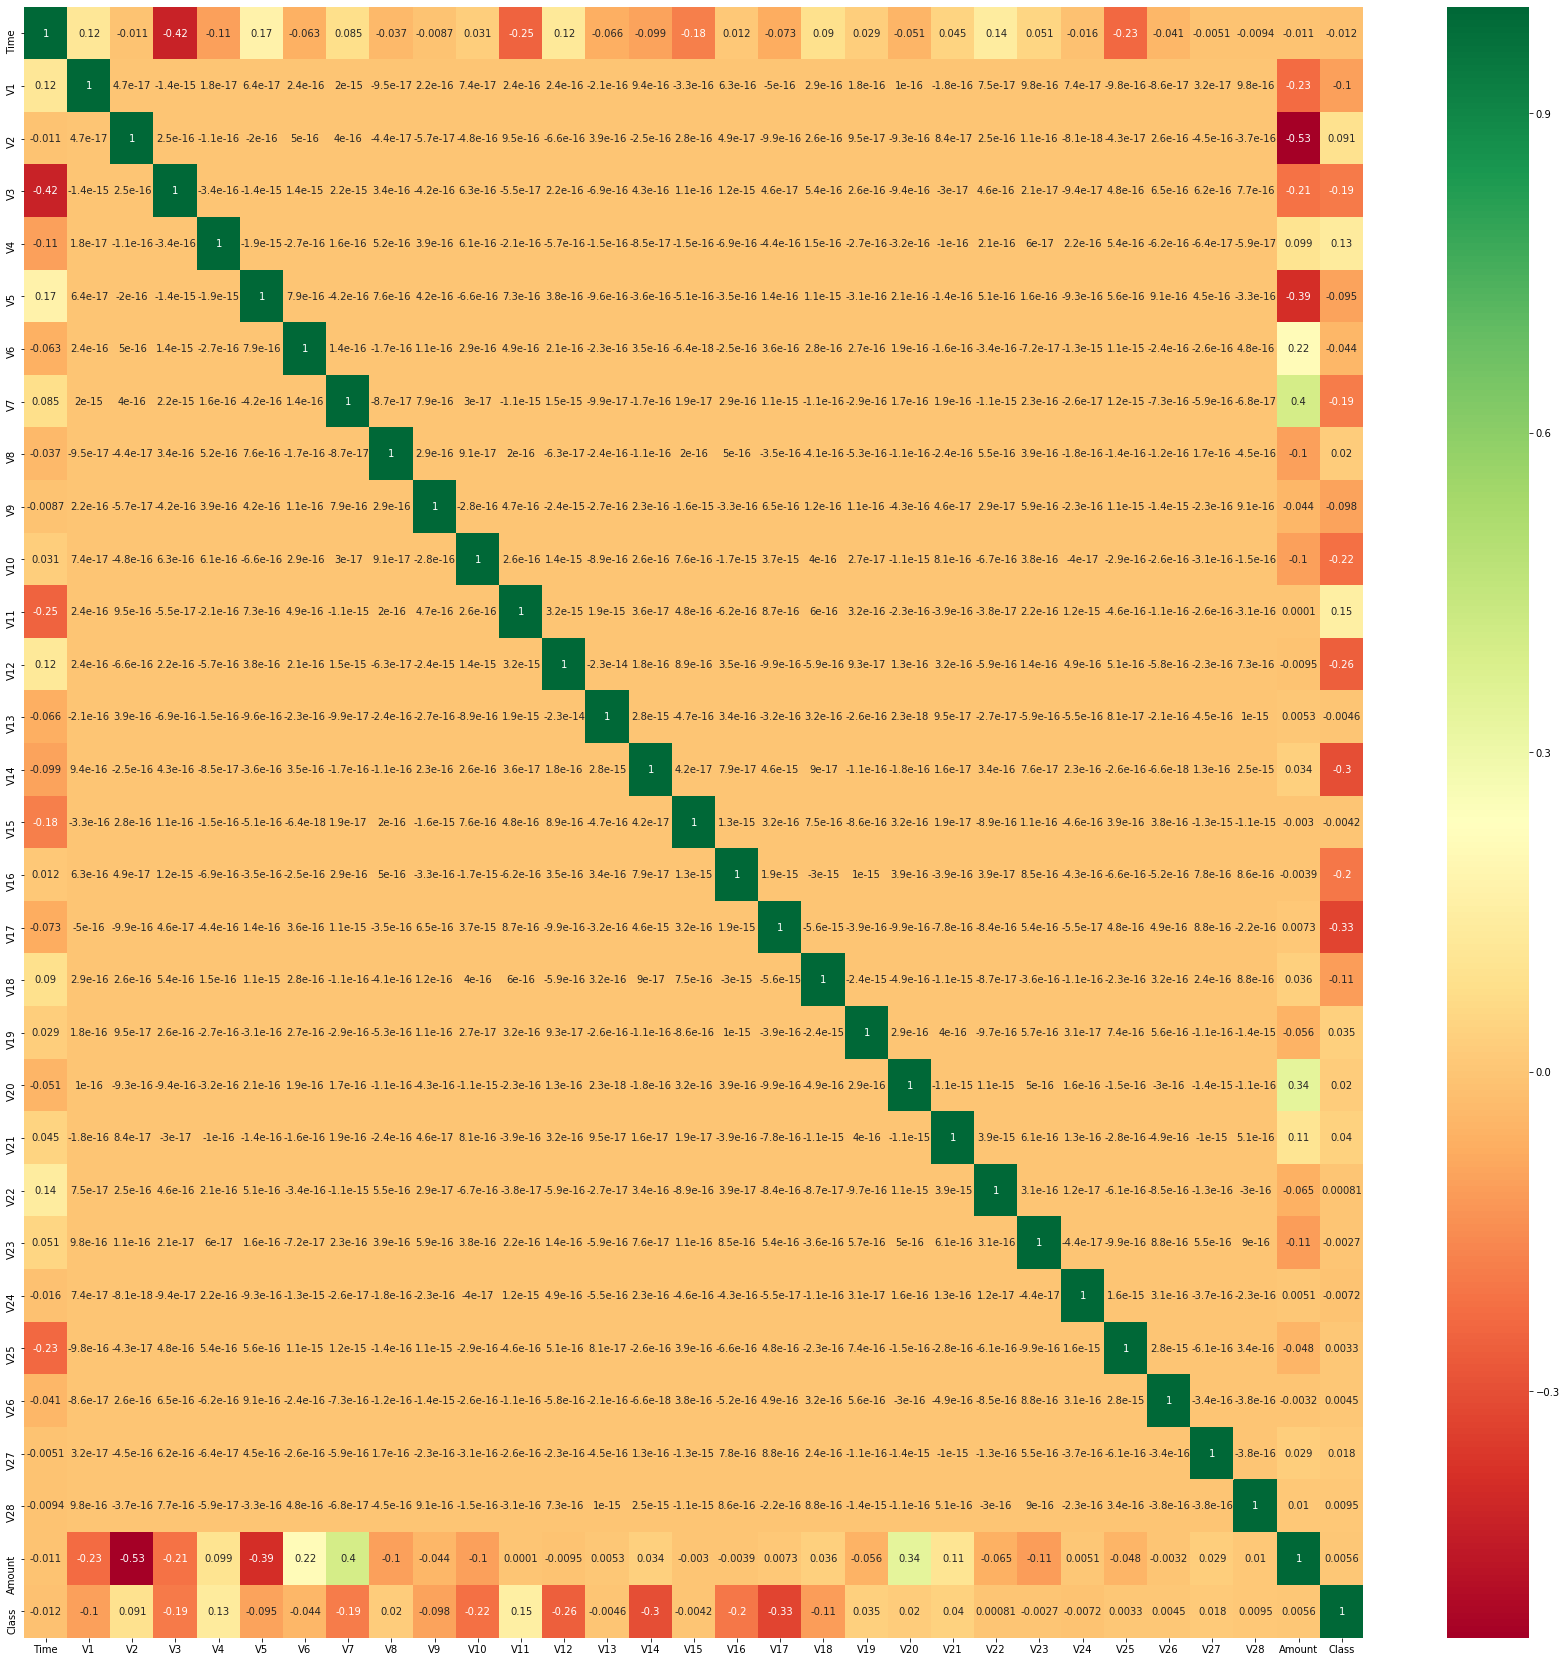

In [16]:
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

## STEP 4:- Split data into train and test

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

### feature scaling of all x variabels

In [18]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [19]:
# saving using joblib
from joblib import dump
dump(stdsc,"scalar.save")

['scalar.save']

### view shape of x_ train , x_test  AND y_train , y_test

In [20]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (213605, 29)
xtest.shape  :  (71202, 29)
ytrain.shape :  (213605,)
ytest.shape  :  (71202,)


## STEP 5:- MODEL - BUILDING ( Random Forest)

In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=0,n_jobs=-1)
rf.fit(xtrain,ytrain)
y_predict=rf.predict(xtest)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# saving using joblib
import pickle 
pickle.dump(rf,open('modell.pkl','wb'))



## Calculating accruracy using (ACCURACY SCORE) And (CONFUSION MATRIX)

In [23]:
# ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)

0.9994803516755147

In [24]:
# CONFUSION MATRIX 

cm = confusion_matrix(ytest, y_predict)
print("confusion Matrix : \n", cm)

confusion Matrix : 
 [[71078     4]
 [   33    87]]


In [25]:
# confusion matrix accruracy
Accuracy_Model = ((cm[0][0] + cm[1][1]) / cm.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Accuracy_Decison    :  99.94803516755148


### We got accuracy of 99.94% - so we are using random forest

# -----------------------------------------------------
# graphically showing our ACTUAL VS PREDICT results 

### LINES SHOW BOTH ACTUAL AND TEST

Text(0.5, 1.0, ' PREDICTED')

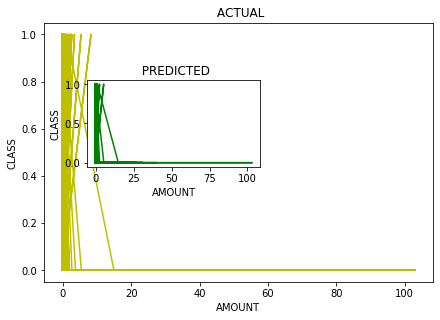

In [26]:
fig=plt.figure()
axis1=fig.add_axes([0.1,0.1,0.9,0.9])# main axis (left,bottom,width,height)
axis2=fig.add_axes([0.2,0.5,0.4,0.3]) #inside axis

#larger figure
axis1.plot(xtest[:,28],ytest,'y')
axis1.set_xlabel('AMOUNT')
axis1.set_ylabel('CLASS')
axis1.set_title(' ACTUAL')

#small figure
axis2.plot(xtest[:,28],y_predict,'g')
axis2.set_xlabel('AMOUNT')
axis2.set_ylabel('CLASS')
axis2.set_title(' PREDICTED')



### SCATTER PLOT OF PREDICT

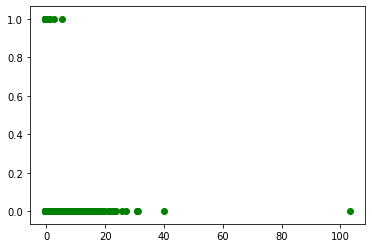

In [27]:
plt.scatter(xtest[:,28],y_predict,label="predict",color="green")

### SCATTER PLOT OF ACTUAL

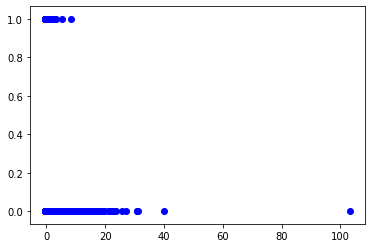

In [28]:
plt.scatter(xtest[:,28],ytest,label="actual",color="blue")

# -----------------------------------------
####  - Predection made by our model


In [30]:
rf.predict([[1,3,4,3,4,3,3,3,3,3,4,4,4,4,4,4,4,5,6,5,5,5,5,5,5,5,5,1,5]])

array([0], dtype=int64)